In [31]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [32]:
import folium
from folium import Map, CircleMarker, Vega, Popup
from vincent import Bar

In [33]:
import pandas as pd
import numpy as np
import sqlite3
from scipy.spatial import ConvexHull

In [34]:
from src.get_historic_missions import *

In [35]:
from  rtree import index
import glob
from src.read_timeGeo import read_timeGeo
import argparse
import src.global_settings as gl
from src.db_skeleton import dbs_class
from src.tools.toECEF import toECEF
from src.tools.toGeodetic import toGeodetic
from src.tools.cg_convex_hull import cg_convex_hull
from src.tools.own_bb import own_bb_Geo
from itertools import product

In [36]:
class dummy_args:
    def __init__(self):
        self.db="temp_1.db3"
        
gl.args = dummy_args()

In [37]:
gl.args.db

'temp_1.db3'

In [38]:
rtree_idx,timeGeoList,db=get_historic_missions()

In [39]:
cnt=0
for r in timeGeoList:
    N=len(r.lat)
    x,y=r.lat[N//2],r.lon[N//2]
    res=db.is_in_image_db(r.hash)
    [x0,y0,x1,y1]=res.rtree_bb
    verg=[x0<x<x1,y0<y<y1,x0<x-0.0005<x1,y0<y-0.0005<y1,x0<x+0.0005<x1,y0<y+0.0005<y1]
    if not all(verg):
        print("--->",verg,y-y0,y1-y)
        break
    lrr=rtree_idx.contains((x-0.0005,y-0.0005,x+0.0005,y+0.0005))
    lr=np.array(list(lrr)).astype(np.int64)
    ids=[]
    ccnt=0
    for h in lr:
        r_tmp=db.is_in_image_db(h)
        if r_tmp is None:
            print("hash error")
            break
        elif r_tmp.id == r.id:
            ccnt+=1
        ids.append(r_tmp.id)
    if ccnt != 1:
        print(cnt,len(lr),"Not found")
    cnt+=1
#    break
#    if len(lr)<1:
#        print(cnt,"-")
#    elif len(lr)>1:
#        print(cnt,"+",len(lr))
#    cnt+=1
#    if r.id != res.id:
#        print("-")
print(cnt)

0 0 Not found
1 0 Not found
2 0 Not found
3 0 Not found
4 0 Not found
5 0 Not found
6 0 Not found
7 0 Not found
8 0 Not found
9 0 Not found
10 0 Not found
11 0 Not found
12 0 Not found
13 0 Not found
14 0 Not found
15 0 Not found
16 0 Not found
17 0 Not found
18 0 Not found
19 0 Not found
20 0 Not found
21 0 Not found
22 0 Not found
23 0 Not found
24 0 Not found
25 0 Not found
26 0 Not found
27 0 Not found
28 0 Not found
29 0 Not found
30 0 Not found
31 0 Not found
32 0 Not found
33 0 Not found
34 0 Not found
35 0 Not found
36 0 Not found
37 0 Not found
38 0 Not found
39 0 Not found
40 0 Not found
41 0 Not found
42 0 Not found
43 0 Not found
44 0 Not found
45 0 Not found
46 0 Not found
47 0 Not found
48 0 Not found
49 0 Not found
50 0 Not found
51 0 Not found
52 0 Not found
53 0 Not found
54 0 Not found
55 0 Not found
56 0 Not found
57 0 Not found
58 0 Not found
59 0 Not found
60 0 Not found
61 0 Not found
62 0 Not found
63 0 Not found
64 0 Not found
65 0 Not found
66 0 Not found
67 0 

In [40]:
r.rtree_bb,res.rtree_bb

(array([54.36064661, 13.08866475, 54.36271029, 13.09160037]),
 array([54.36064661, 13.08866475, 54.36271029, 13.09160037]))

In [41]:
list(rtree_idx.contains((x-0.00015,y-0.00015,x+0.00015,y+0.00015)))

[]

In [42]:
timeGeoList[-1].rtree_bb-res.rtree_bb

array([0., 0., 0., 0.])

In [43]:
x0,y0=res.rtree_bb[0:2]

In [44]:
fx,fy=res.rtree_bb[2]-res.rtree_bb[0],res.rtree_bb[3]-res.rtree_bb[1]

In [45]:
rtree_idx.insert(1,[x0+0*fx,y0+0*fy,x0+0.9*fx,y0+0.9*fy])

In [46]:
pp=lambda sc1,sc2:[x0+sc1*fx,y0+sc1*fy,x0+sc2*fx,y0+sc2*fy]

In [47]:
len(list(rtree_idx.intersection(pp(0.01,0.02))))

588

In [48]:
def bb_to_line(bb):
    return [[bb[0],bb[1]],
            [bb[0],bb[3]],
            [bb[2],bb[3]],
            [bb[2],bb[1]],
            [bb[0],bb[1]]]
def kasten(la,lo):
    cf=0.00001*5
    bb=[la-cf,lo-cf,la+cf,lo+cf]
    return bb_to_line(bb)

In [49]:
s1=0.5
s2=0.51
print(len(list(rtree_idx.intersection(pp(s1,s2)))))
m=folium.Map([x,y],zoom_start=17)
for idx,r in enumerate(timeGeoList):
    s1=s2=1/128.0/4
    x0,y0,x1,y1=r.rtree_bb
    fx,fy=r.rtree_bb[2]-r.rtree_bb[0],r.rtree_bb[3]-r.rtree_bb[1]
    pp=lambda sc1,sc2:[x0+sc1*fx,y0+sc1*fy,x0+sc2*fx,y0+sc2*fy]
    folium.PolyLine(bb_to_line(pp(0.5-s1,0.5+s2)),popup=str(idx)).add_to(m)
    #print(len(list(rtree_idx.intersection(pp(0.5-s1,0.5+s2)))))
    
#folium.PolyLine(bb_to_line(pp(s1,s2)),color="red").add_to(m)

m

669


In [50]:
idx=323
r=timeGeoList[idx]

In [51]:
import altair as alt
import pandas as pd


cars = pd.DataFrame({'x':r.perc,'y':r.time-r.time[0]})

a=alt.Chart(cars).mark_point().encode(
    x='x',
    y='y'
)


In [52]:
m=folium.Map([x,y],zoom_start=17)
a=[]
tt=[]
for idx in range(0,800,10):
    r=timeGeoList[idx]    
    fg_ = folium.FeatureGroup(name=str(idx))
    N=len(r.lat)
    x,y=r.lat[N//2],r.lon[N//2]
    s1=s2=1/128.0
    x0,y0,x1,y1=r.rtree_bb
    fx,fy=r.rtree_bb[2]-r.rtree_bb[0],r.rtree_bb[3]-r.rtree_bb[1]
    pp=lambda sc1,sc2:[x0+sc1*fx,y0+sc1*fy,x0+sc2*fx,y0+sc2*fy]
    pop=f"{idx,r.speed.mean(),np.rad2deg(r.yaw.mean())}"
    #folium.PolyLine(bb_to_line(pp(0.5-s1,0.5+s2)),popup=pop,).add_to(m)
    #folium.PolyLine(bb_to_line(pp(0.3,0.7)),popup=str(idx)).add_to(m)
    cars = pd.DataFrame({'x':r.perc,'y':r.speed})
    a.append(alt.Chart(cars).mark_point().encode(x='x',y='y'))
    popup = folium.Popup(max_width=650)
    folium.VegaLite(a[-1], height=350, width=650).add_to(popup)
    folium.PolyLine(kasten(x,y),popup=popup).add_to(fg_)
    G0,G1,G=r.get_externals(True)
    folium.PolyLine(G0,color="green").add_to(fg_)
    folium.PolyLine(G1,color="red").add_to(fg_)
    folium.PolyLine(G,color="black").add_to(fg_)
    tt.append(r.time)
    
    
    m.add_child(fg_)

folium.LayerControl(collapsed=False).add_to(m)
m

In [53]:
t1=timeGeoList.copy()

In [54]:
t1.sort(key=lambda x: x.time[-1])

In [55]:
m=folium.Map([x,y],zoom_start=17)
a=[]
tt=[]
#160:250
#660:760
lsl=list(range(160,260,10))
lsl.extend(list(range(660,760,10)))
for idx in lsl:
    r=t1[idx]    
    fg_ = folium.FeatureGroup(name=str(idx))
    N=len(r.lat)
    x,y=r.lat[N//2],r.lon[N//2]
    s1=s2=1/128.0
    x0,y0,x1,y1=r.rtree_bb
    fx,fy=r.rtree_bb[2]-r.rtree_bb[0],r.rtree_bb[3]-r.rtree_bb[1]
    pp=lambda sc1,sc2:[x0+sc1*fx,y0+sc1*fy,x0+sc2*fx,y0+sc2*fy]
    pop=f"{idx,r.speed.mean(),np.rad2deg(r.yaw.mean())}"
    #folium.PolyLine(bb_to_line(pp(0.5-s1,0.5+s2)),popup=pop,).add_to(m)
    #folium.PolyLine(bb_to_line(pp(0.3,0.7)),popup=str(idx)).add_to(m)
    ###cars = pd.DataFrame({'x':r.perc,'y':r.speed})
    ###a.append(alt.Chart(cars).mark_point().encode(x='x',y='y'))
    ###popup = folium.Popup(max_width=650)
    ###folium.VegaLite(a[-1], height=350, width=650).add_to(popup)
    ###folium.PolyLine(kasten(x,y),popup=popup).add_to(fg_)
    G0,G1,G=r.get_externals(True)
    folium.PolyLine(G0,color="green").add_to(fg_)
    folium.PolyLine(G1,color="red").add_to(fg_)
    folium.PolyLine(G,color="black").add_to(fg_)
    GG=np.concatenate((G0,G1))
    dd=ConvexHull(GG)
    folium.PolyLine(GG[dd.vertices],color="magenta",stroke=0.01).add_to(fg_)
    
    
    m.add_child(fg_)

folium.LayerControl(collapsed=False).add_to(m)
m

In [56]:
m=folium.Map([x,y],zoom_start=17)
##a=[]
yy=[]
xx=[]
for idx in range(550,570,50):
    r=timeGeoList[idx]
    G0,G1,G=r.get_externals(True)
    p=np.polyfit(G[:,0],G[:,1],1)
    ryaw=np.arctan(p[0])
    yy.append(ryaw)
    xx.append(G.mean(axis=0))
yaw=np.mean(yy)
yaw=-yaw
dm=np.array([[np.cos(yaw),-np.sin(yaw)],[np.sin(yaw),np.cos(yaw)]])
c=np.mean(xx,axis=0)

In [57]:
for idx in range(550,570,50):
    r=timeGeoList[idx]    
    fg_ = folium.FeatureGroup(name=str(idx))
    N=len(r.lat)
    x,y=r.lat[N//2],r.lon[N//2]
    s1=s2=0.5 #1/128.0
    x0,y0,x1,y1=r.rtree_bb
    fx,fy=r.rtree_bb[2]-r.rtree_bb[0],r.rtree_bb[3]-r.rtree_bb[1]
    pp=lambda sc1,sc2:[x0+sc1*fx,y0+sc1*fy,x0+sc2*fx,y0+sc2*fy]
    pop=f"{idx,r.speed.mean(),np.rad2deg(r.yaw.mean())}"
    folium.PolyLine(bb_to_line(pp(0.5-s1,0.5+s2)),popup=pop,).add_to(m)
    #folium.PolyLine(bb_to_line(pp(0.3,0.7)),popup=str(idx)).add_to(m)
    ##cars = pd.DataFrame({'x':r.perc,'y':r.yaw*180.0/np.pi})
    ##a.append(alt.Chart(cars).mark_point().encode(x='x',y='y'))
    ##popup = folium.Popup(max_width=650)
    ##folium.VegaLite(a[-1], height=350, width=650).add_to(popup)
    folium.PolyLine(kasten(x,y),popup=pop).add_to(fg_)
    G0,G1,G=r.get_externals(True)
    
    G1=G1-c
    G1=np.matmul(dm,G1.transpose()).transpose()
    G1=G1+c
    
    G0=G0-c
    G0=np.matmul(dm,G0.transpose()).transpose()
    G0=G0+c
    
    folium.PolyLine(G0,color="green").add_to(fg_)
    folium.PolyLine(G1,color="red").add_to(fg_)
    folium.PolyLine(G,color="black").add_to(fg_)
    GG=np.concatenate((G0,G1))
    dd=ConvexHull(GG)
    folium.PolyLine(GG[dd.vertices],color="magenta").add_to(fg_)

    
    m.add_child(fg_)

folium.LayerControl(collapsed=False).add_to(m)
m

<IPython.core.display.Javascript object>


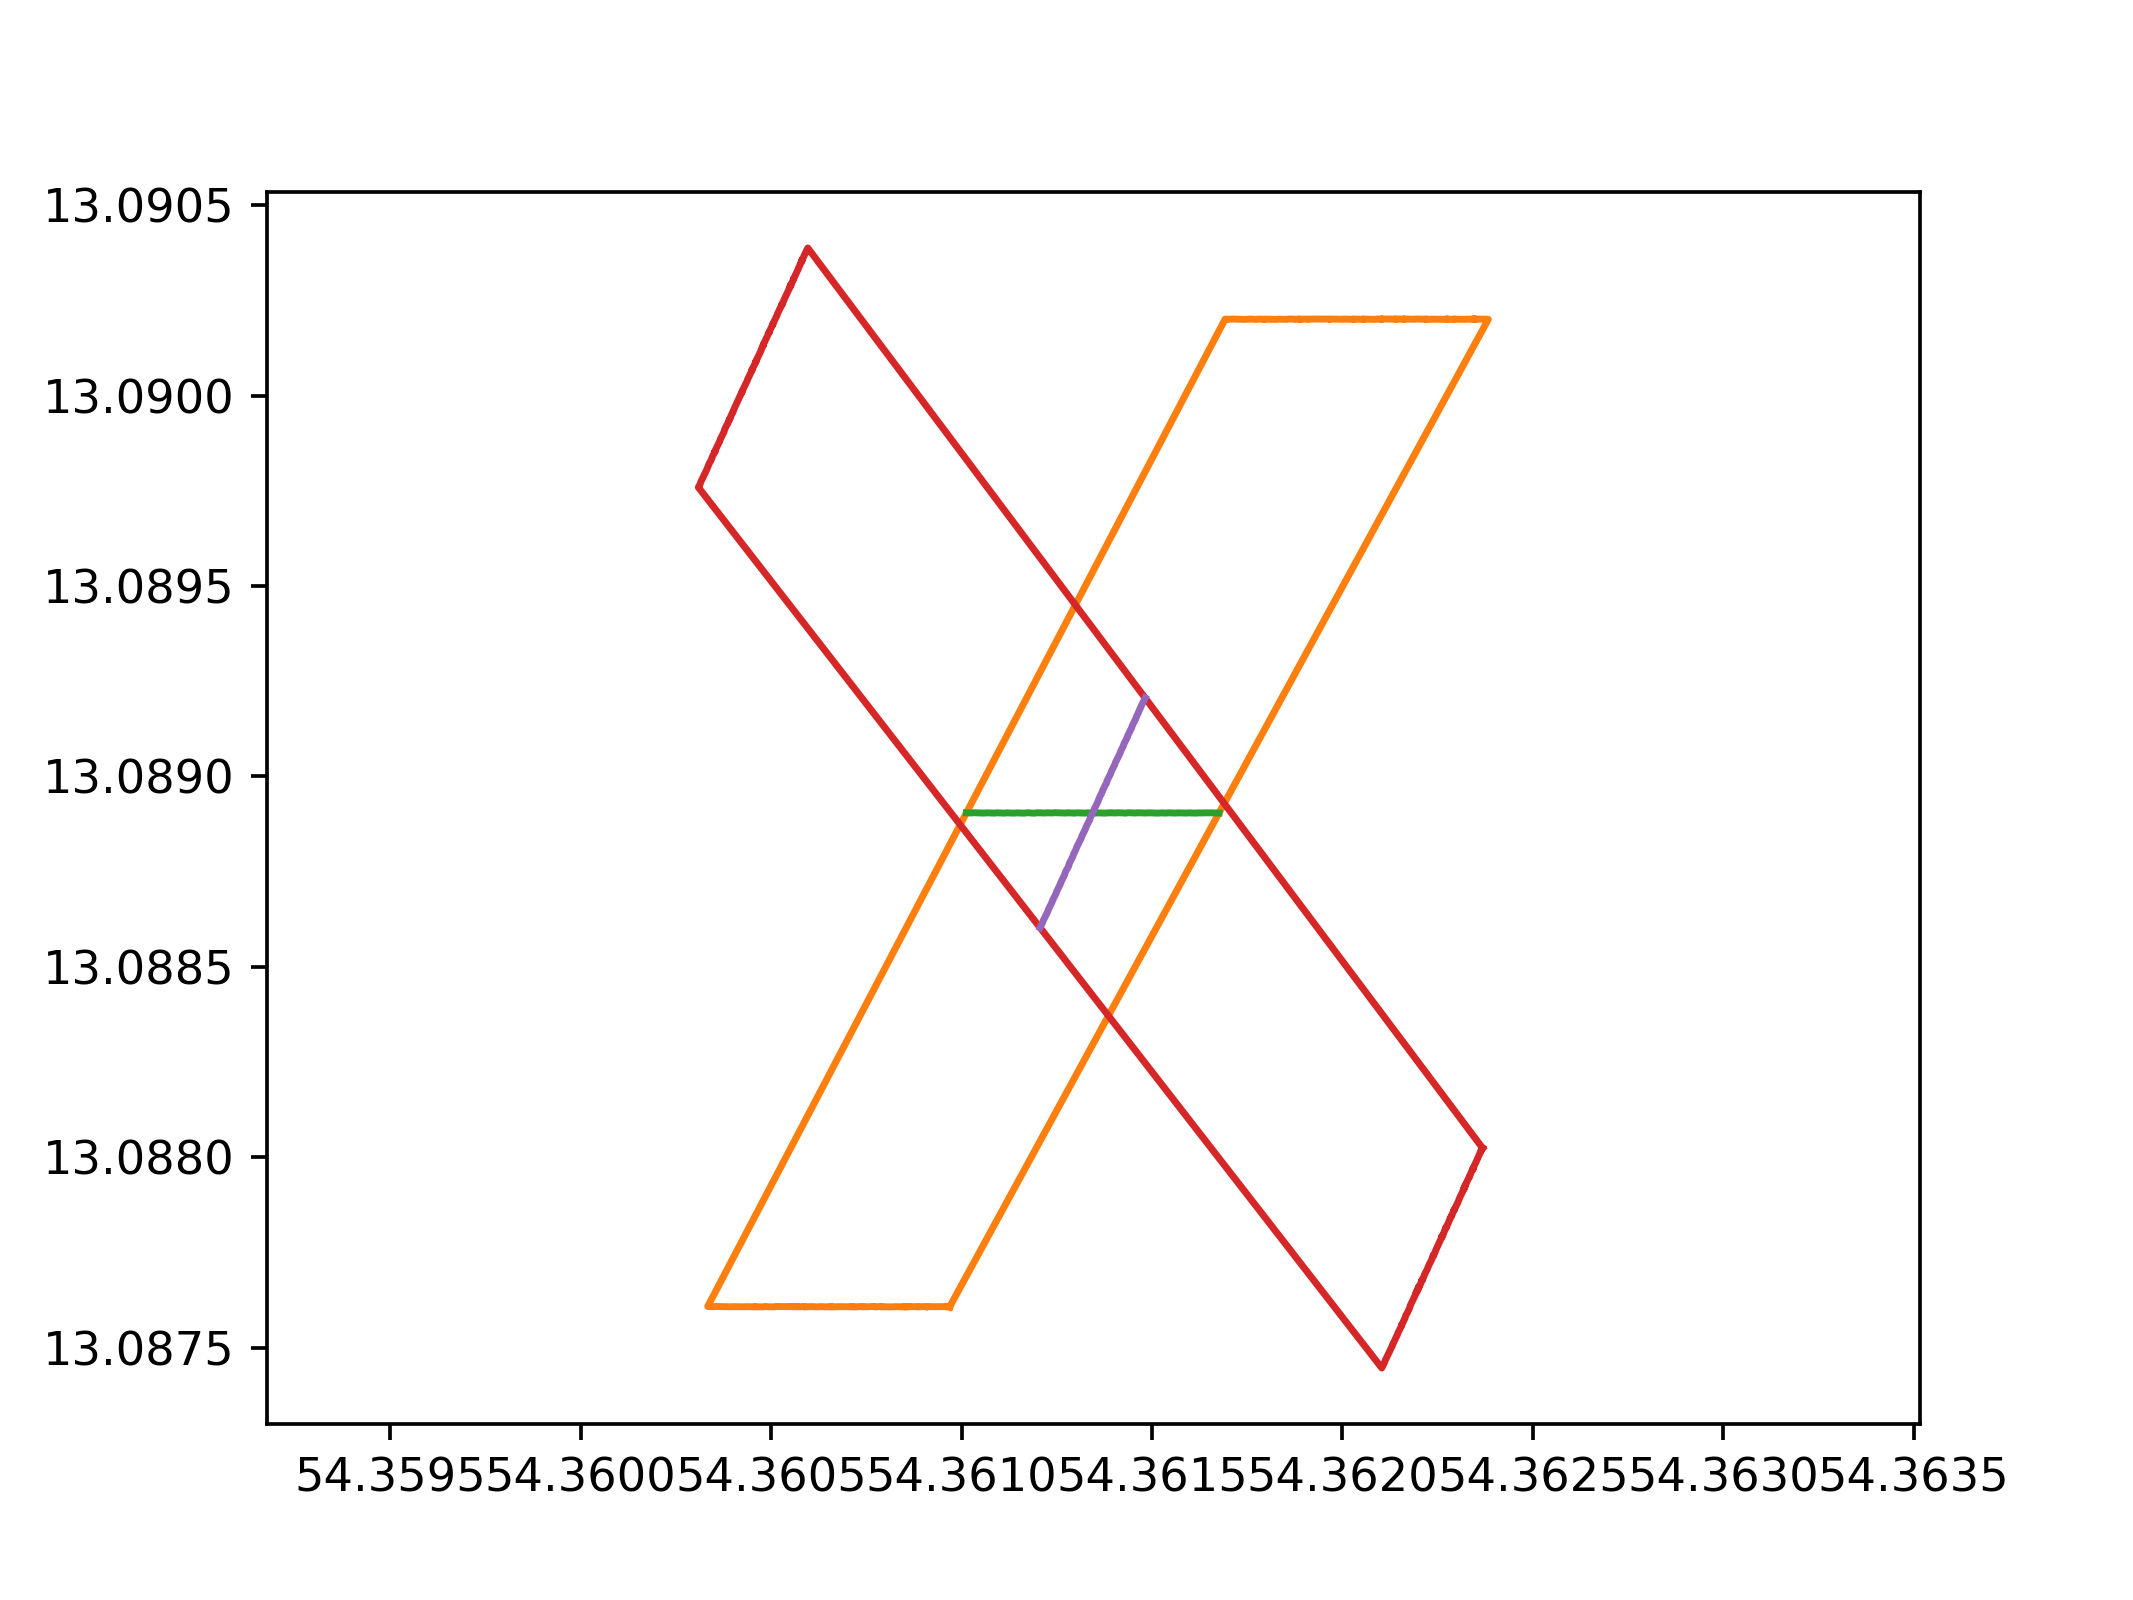

0.0014769017920058297
0.0014769017920061558


In [27]:
yy=[]
xx=[]
for idx in range(550,570,50):
    r=timeGeoList[idx]
    G0,G1,G=r.get_externals(True)
    p=np.polyfit(G[:,0],G[:,1],1)
    ryaw=np.arctan(p[0])
    yy.append(ryaw)
    xx.append(G.mean(axis=0))
yaw=np.mean(yy)
yaw=-yaw
dm=np.array([[np.cos(yaw),-np.sin(yaw)],[np.sin(yaw),np.cos(yaw)]])
c=np.mean(xx,axis=0)
for idx in range(550,570,50):
    r=timeGeoList[idx]    
    N=len(r.lat)
    x,y=r.lat[N//2],r.lon[N//2]
    plt.plot(x,y)
    G0,G1,G=r.get_externals(True)
    G11=G1.copy()
    G00=G0.copy()
    
    G1=G1-c
    G1=np.matmul(dm,G1.transpose()).transpose()
    G1=G1+c
    
    G0=G0-c
    G0=np.matmul(dm,G0.transpose()).transpose()
    G0=G0+c
    
    G01=np.concatenate((G0,G1[::-1],G0[0:1]))
    
    GX=np.concatenate((G00,G11[::-1],G00[0:1]))
    GG=G.copy()
    GG=GG-c
    GG=np.matmul(dm,GG.transpose()).transpose()
    GG=GG+c
    plt.plot(G01[:,0],G01[:,1])
    plt.plot(GG[:,0],GG[:,1])
    plt.plot(GX[:,0],GX[:,1])
    plt.plot(G[:,0],G[:,1])
    print(np.linalg.norm(G[0]-G00[0]))
    print(np.linalg.norm(GG[0]-G0[0]))
    plt.axis('equal')

plt.show()

In [28]:
x=GG[0]-GG[-1]
y=GG[0]-G0[1]
np.dot(x/np.linalg.norm(x),y/np.linalg.norm(y))

0.4822407325569693